In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

np.random.seed(1729)
plt.rcParams['figure.figsize'] = 15, 8

In [71]:
# Simulation function
def sim_func(x, a, b, c):
    return a * np.exp(-b * abs(x - 9)) + c

In [72]:
# Historical prices
price = np.linspace(8, 14, 100)

In [73]:
price

array([ 8.        ,  8.06060606,  8.12121212,  8.18181818,  8.24242424,
        8.3030303 ,  8.36363636,  8.42424242,  8.48484848,  8.54545455,
        8.60606061,  8.66666667,  8.72727273,  8.78787879,  8.84848485,
        8.90909091,  8.96969697,  9.03030303,  9.09090909,  9.15151515,
        9.21212121,  9.27272727,  9.33333333,  9.39393939,  9.45454545,
        9.51515152,  9.57575758,  9.63636364,  9.6969697 ,  9.75757576,
        9.81818182,  9.87878788,  9.93939394, 10.        , 10.06060606,
       10.12121212, 10.18181818, 10.24242424, 10.3030303 , 10.36363636,
       10.42424242, 10.48484848, 10.54545455, 10.60606061, 10.66666667,
       10.72727273, 10.78787879, 10.84848485, 10.90909091, 10.96969697,
       11.03030303, 11.09090909, 11.15151515, 11.21212121, 11.27272727,
       11.33333333, 11.39393939, 11.45454545, 11.51515152, 11.57575758,
       11.63636364, 11.6969697 , 11.75757576, 11.81818182, 11.87878788,
       11.93939394, 12.        , 12.06060606, 12.12121212, 12.18

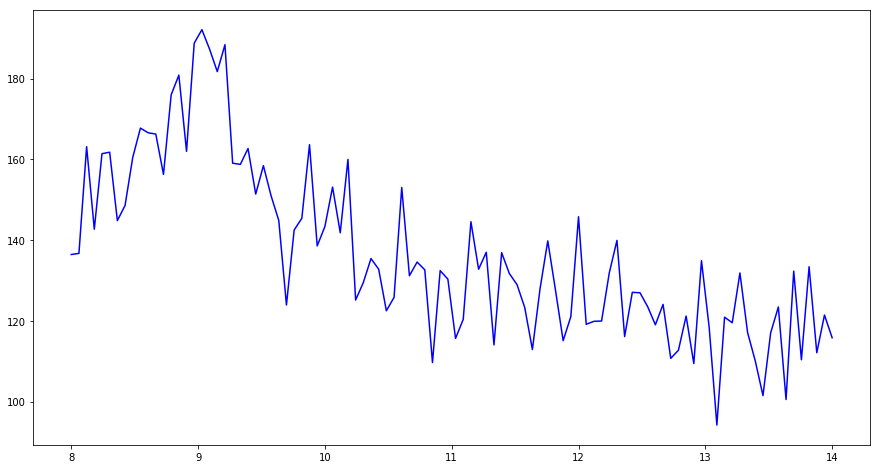

In [74]:
# Historical demand
y = sim_func(price, 70.0, 1.1, 120.0)
y_noise = 10. * np.random.normal(size=price.size)
demand = y + y_noise
plt.plot(price, demand, 'b-', label='data')

[-5.93066415e-02  2.50753741e+00 -3.69485449e+01  1.94890327e+02
  1.00000000e+02 -2.53568451e+03]


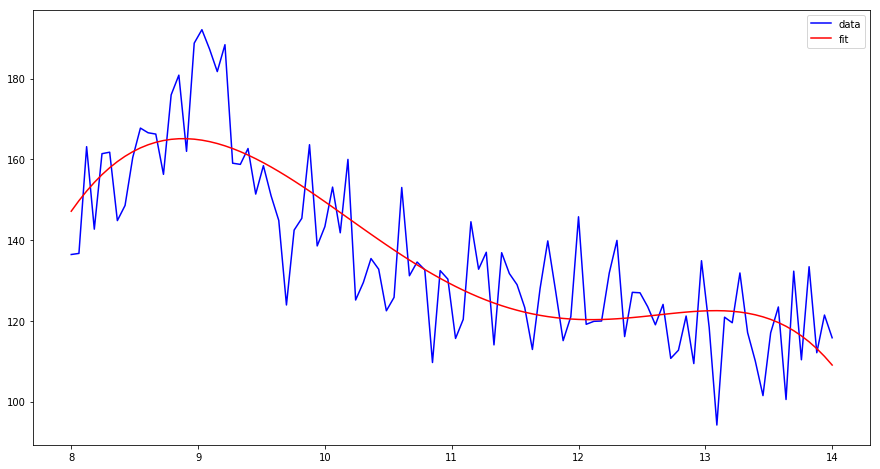

In [75]:
def func(x, a, b, c, d, e, f):
    return a * np.power(x, 5) + b * np.power(x, 4) + c * np.power(x, 3) + d * np.power(x, 2) + e * x + f 

# popt, pcov = curve_fit(func, price, demand, maxfev = 8000)
popt, pcov = curve_fit(func, price, demand, maxfev = 8000, bounds=(-1e5, [10., 1e2, 1e2, 1e10, 1e2, 1e2]))
print(popt)

plt.plot(price, demand, 'b-', label='data')
plt.plot(price, func(price, *popt), 'r-', label='fit')
plt.legend()

In [76]:
# Optimization problem 
# Revenue = sum(Price * Sales)

# Let's take 13 weeks 
w = 13

# Optimization function is:
def revenue(p):
    return p*func(p, *popt)

def obj(x):
    print("LIST OF X", x)
    return -sum([revenue(i) for i in x])

# Sales function
def sales_function(x):
    return sum([func(i, *popt) for i in x])

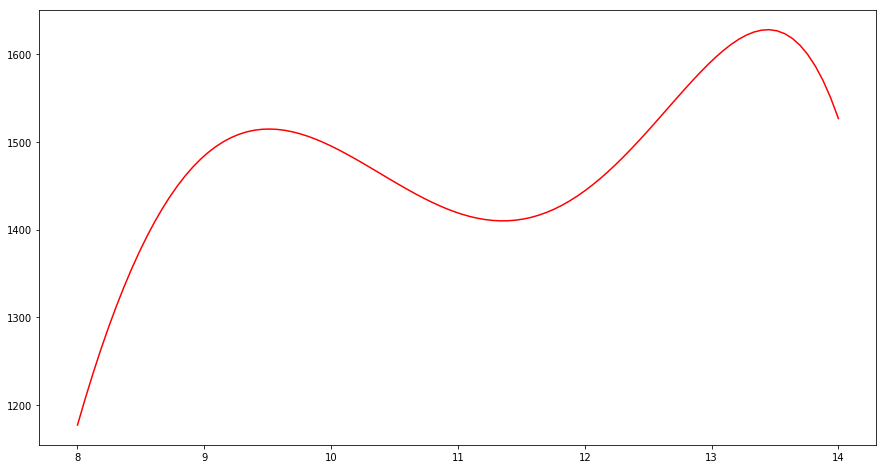

In [77]:
# Revenue curve
plt.plot(price, revenue(price), 'r-', label='revenue')

In [78]:
# Prices limits
b = (8.0,14.0)
bnds = [b for _ in range(w)]
bnds

[(8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0),
 (8.0, 14.0)]

In [79]:
# Inventory limit 1800 items
def constraint(x):
    total_items = 1800.
    return total_items - sum([func(i, *popt) for i in x])

con = {'type': 'ineq', 'fun': constraint} 

In [80]:
con

{'type': 'ineq', 'fun': <function __main__.constraint(x)>}

In [81]:
# initial approximation
x0 = 11. * np.ones(w)

# show initial objective
print('Initial Objective (Revenue): ' + str(-obj(x0)))

# show initial sales
print('Initial Sales: ' + str(sales_function(x0)))

LIST OF X [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
Initial Objective (Revenue): 18446.021492761
Initial Sales: 1676.911044796455


In [82]:
# Find solution
solution = minimize(obj, x0, method='SLSQP', bounds=bnds, constraints=[con])

LIST OF X [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
LIST OF X [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
LIST OF X [11.00000001 11.         11.         11.         11.         11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X [11.         11.00000001 11.         11.         11.         11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X [11.         11.         11.00000001 11.         11.         11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X [11.         11.         11.         11.00000001 11.         11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X [11.         11.         11.         11.         11.00000001 11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X [11.         11.         11.         11.         11.         11.00000001
 11.         11.   

LIST OF X [10.01091219 11.02061185 13.18764755 13.58986242 13.0292662  13.4360196
 13.3344544  13.23880852  9.75095195 13.41680151 12.94857011  9.28038243
 10.06765956]
LIST OF X [10.01091219 11.02061185 13.18764755 13.5898624  13.02926621 13.4360196
 13.3344544  13.23880852  9.75095195 13.41680151 12.94857011  9.28038243
 10.06765956]
LIST OF X [10.01091219 11.02061185 13.18764755 13.5898624  13.0292662  13.43601961
 13.3344544  13.23880852  9.75095195 13.41680151 12.94857011  9.28038243
 10.06765956]
LIST OF X [10.01091219 11.02061185 13.18764755 13.5898624  13.0292662  13.4360196
 13.33445441 13.23880852  9.75095195 13.41680151 12.94857011  9.28038243
 10.06765956]
LIST OF X [10.01091219 11.02061185 13.18764755 13.5898624  13.0292662  13.4360196
 13.3344544  13.23880854  9.75095195 13.41680151 12.94857011  9.28038243
 10.06765956]
LIST OF X [10.01091219 11.02061185 13.18764755 13.5898624  13.0292662  13.4360196
 13.3344544  13.23880852  9.75095197 13.41680151 12.94857011  9.28038243

LIST OF X [ 9.50932828  9.51009352 13.44395702 13.44380317 13.44406074 13.44268441
 13.44425037 13.44369365  9.50920147 13.44324356 13.44454397  9.50901787
  9.50929021]
LIST OF X [ 9.50932828  9.51009352 13.44395702 13.44380317 13.44406074 13.44268441
 13.44425037 13.44369365  9.50920147 13.44324356 13.44454397  9.50901787
  9.50929021]
LIST OF X [ 9.50932829  9.51009352 13.44395702 13.44380317 13.44406074 13.44268441
 13.44425037 13.44369365  9.50920147 13.44324356 13.44454397  9.50901787
  9.50929021]
LIST OF X [ 9.50932828  9.51009353 13.44395702 13.44380317 13.44406074 13.44268441
 13.44425037 13.44369365  9.50920147 13.44324356 13.44454397  9.50901787
  9.50929021]
LIST OF X [ 9.50932828  9.51009352 13.44395703 13.44380317 13.44406074 13.44268441
 13.44425037 13.44369365  9.50920147 13.44324356 13.44454397  9.50901787
  9.50929021]
LIST OF X [ 9.50932828  9.51009352 13.44395702 13.44380318 13.44406074 13.44268441
 13.44425037 13.44369365  9.50920147 13.44324356 13.44454397  9.509

In [83]:
x = solution.x

# show final objective
print('Final Objective (Revenue): ' + str(-obj(x)))

# show initial sales
print('Final Sales: ' + str(sales_function(x)))

LIST OF X [ 9.50939236  9.50944371 13.4437854  13.44383572 13.44382857 13.44380046
 13.44378534 13.44379903  9.50941211 13.44381986 13.44383186  9.5094026
  9.50937543]
Final Objective (Revenue): 20594.706496320934
Final Sales: 1764.960496208103


In [84]:
x

array([ 9.50939236,  9.50944371, 13.4437854 , 13.44383572, 13.44382857,
       13.44380046, 13.44378534, 13.44379903,  9.50941211, 13.44381986,
       13.44383186,  9.5094026 ,  9.50937543])

# Another elasticity function 

[2.24949105e-03 8.39999998e-01 8.97935352e+00 1.00000066e+01
 1.22444259e+02]


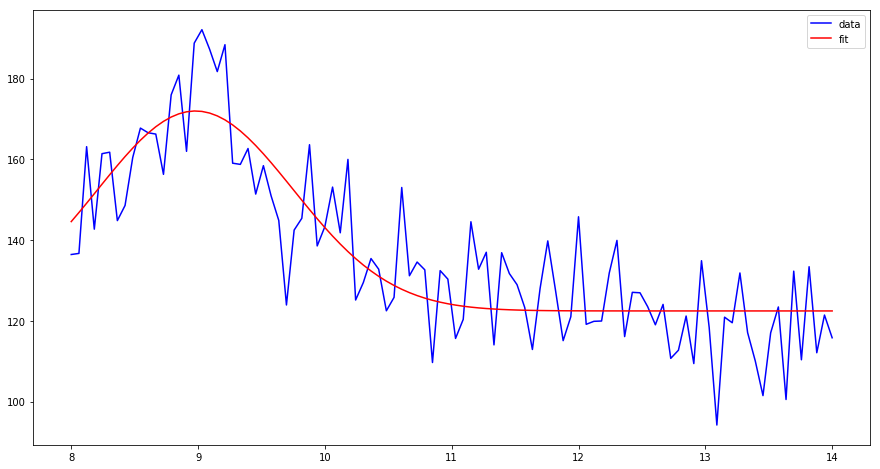

In [48]:
def func2(x, a, b, c, d, e):
#     return np.exp(-b * np.power(x-c, 2) + d)
    return a * np.exp(-b * np.power(x-c, 2) + d) + e 

popt, pcov = curve_fit(func2, price, demand, maxfev = 8000,  bounds=([0., 0, 8, 10, 10], 
                                                                     [1e2, 0.84, 10, 1e2, 1e5]))

print(popt)

plt.plot(price, demand, 'b-', label='data')
plt.plot(price, func2(price, *popt), 'r-', label='fit')
plt.legend()

In [49]:
# Optimization problem 
# Revenue = sum(Price * Sales)

# Let's take 13 weeks 
w = 13

# Optimization function is:
def revenue(p):
    return p*func2(p, *popt)

def obj(x):
    print("LIST OF X:", x)
    return -sum([revenue(i) for i in x])

# Sales function
def sales_function(x):
    return sum([func2(i, *popt) for i in x])

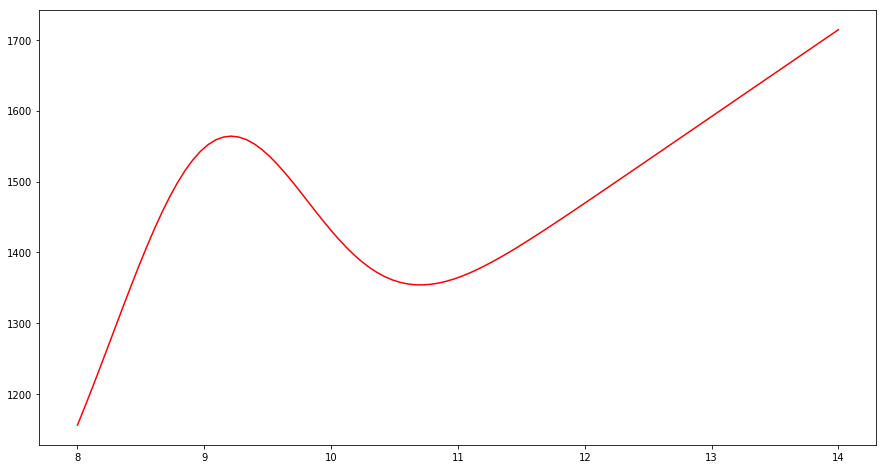

In [50]:
# Revenue curve
plt.plot(price, revenue(price), 'r-', label='revenue')

In [51]:
# Inventory limit 1800 items
def constraint(x):
    total_items = 1800.
    return total_items - sum([func2(i, *popt) for i in x])

con = {'type': 'ineq', 'fun': constraint} 

In [52]:
# initial approximation
x0 = 11. * np.ones(w)

# show initial objective
print('Initial Objective (Revenue): ' + str(-obj(x0)))

# show initial sales
print('Initial Sales: ' + str(sales_function(x0)))

LIST OF X: [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
Initial Objective (Revenue): 17739.067359245983
Initial Sales: 1612.6424872041807


In [53]:
solution

     fun: -20594.706496320934
     jac: array([-0.00244141,  0.00830078, -0.01977539, -0.01220703,  0.02099609,
       -0.02587891,  0.02709961, -0.00610352, -0.00219727,  0.02099609,
        0.01464844, -0.00244141, -0.0078125 ])
 message: 'Optimization terminated successfully.'
    nfev: 559
     nit: 35
    njev: 35
  status: 0
 success: True
       x: array([ 9.50939236,  9.50944371, 13.4437854 , 13.44383572, 13.44382857,
       13.44380046, 13.44378534, 13.44379903,  9.50941211, 13.44381986,
       13.44383186,  9.5094026 ,  9.50937543])

In [54]:
x0

array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.])

In [55]:
# Find solution
solution = minimize(obj, x0, method='SLSQP', bounds=bnds, constraints=[con], tol=0.01, options={"maxiter":10000, 'disp': True})

LIST OF X: [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
LIST OF X: [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
LIST OF X: [11.00000001 11.         11.         11.         11.         11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X: [11.         11.00000001 11.         11.         11.         11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X: [11.         11.         11.00000001 11.         11.         11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X: [11.         11.         11.         11.00000001 11.         11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X: [11.         11.         11.         11.         11.00000001 11.
 11.         11.         11.         11.         11.         11.
 11.        ]
LIST OF X: [11.         11.         11.         11.         11.         11.00000001
 11.       

In [25]:
x = solution.x

# show final objective
print('Final Objective (Revenue): ' + str(-obj(x)))

# show initial sales
print('Final Sales: ' + str(sales_function(x)))

Final Objective (Revenue): 22284.855228626384
Final Sales: 1591.7753734733124


In [26]:
x

array([14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.])

In [109]:
solution

     fun: -21877.76800384267
     jac: array([-120.20751953, -120.20751953, -120.20751953, -120.20751953,
       -120.20751953, -120.20751953, -120.20751953, -120.20751953,
       -120.20751953, -120.20751953, -120.20751953, -120.20751953,
       -120.20751953])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.])

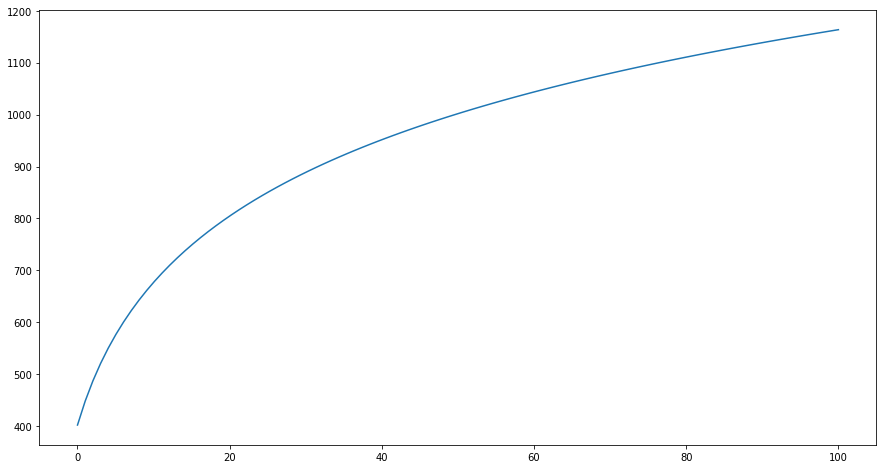

In [19]:
def inventory(x):
    a = 0.2
    return 250 * np.log(x + 5)
inv_level = np.linspace(0, 100, 100)
plt.plot(inv_level, inventory(inv_level))

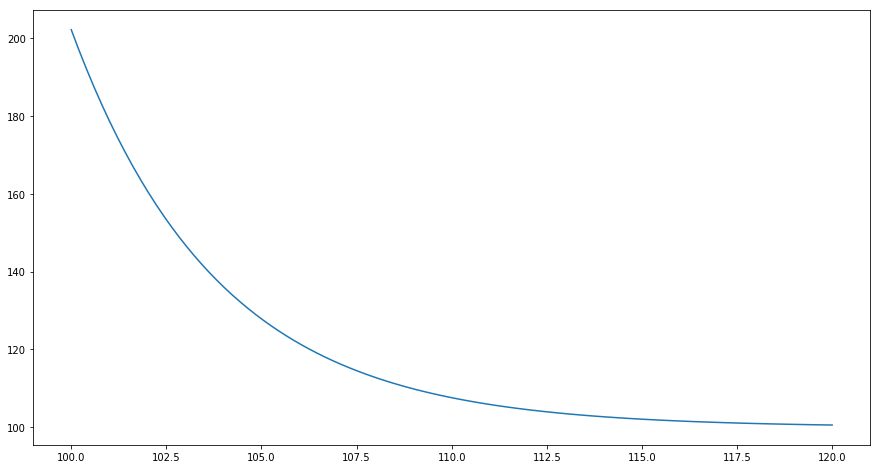

In [23]:
a = 100 #min forecast
b = 200 #max forecast

def elasticity_func(x):
    return b * np.exp(-0.26 * x) * 1e11 + a

pricing_level = np.linspace(100, 120, 100)
plt.plot(pricing_level, elasticity_func(pricing_level))